In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.dropna(subset = ['nameDest'])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing values in the provided data set

In [5]:
if df.duplicated().any():
  print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

deleted the repeated values

In [6]:
df.shape

(6362620, 11)

In [7]:
merchants = df

In [8]:
merchants = merchants[merchants['nameDest'].str.startswith('M')]

In [9]:
merchants.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [10]:
df = df[~df['nameDest'].str.startswith('M')]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4211125 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 385.5+ MB


In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0


In [13]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

In [14]:
un_useful_cols = ['nameOrig','nameDest']
df = df.drop(un_useful_cols,axis=1)

In [15]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['type'], dtype='object')


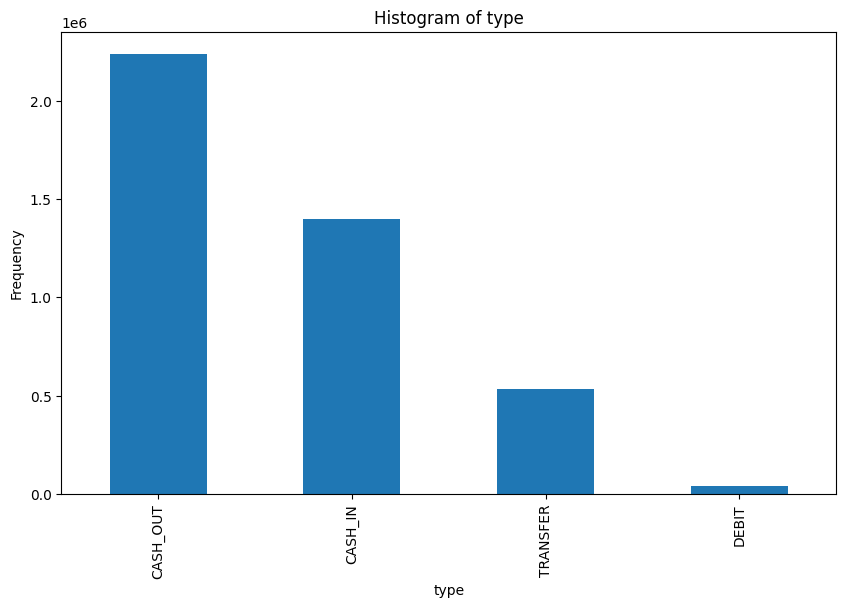

In [16]:
for column in objList:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>,
        <Axes: title={'center': 'Actual_amount_orig'}>],
       [<Axes: title={'center': 'Actual_amount_dest'}>, <Axes: >,
        <Axes: >]], dtype=object)

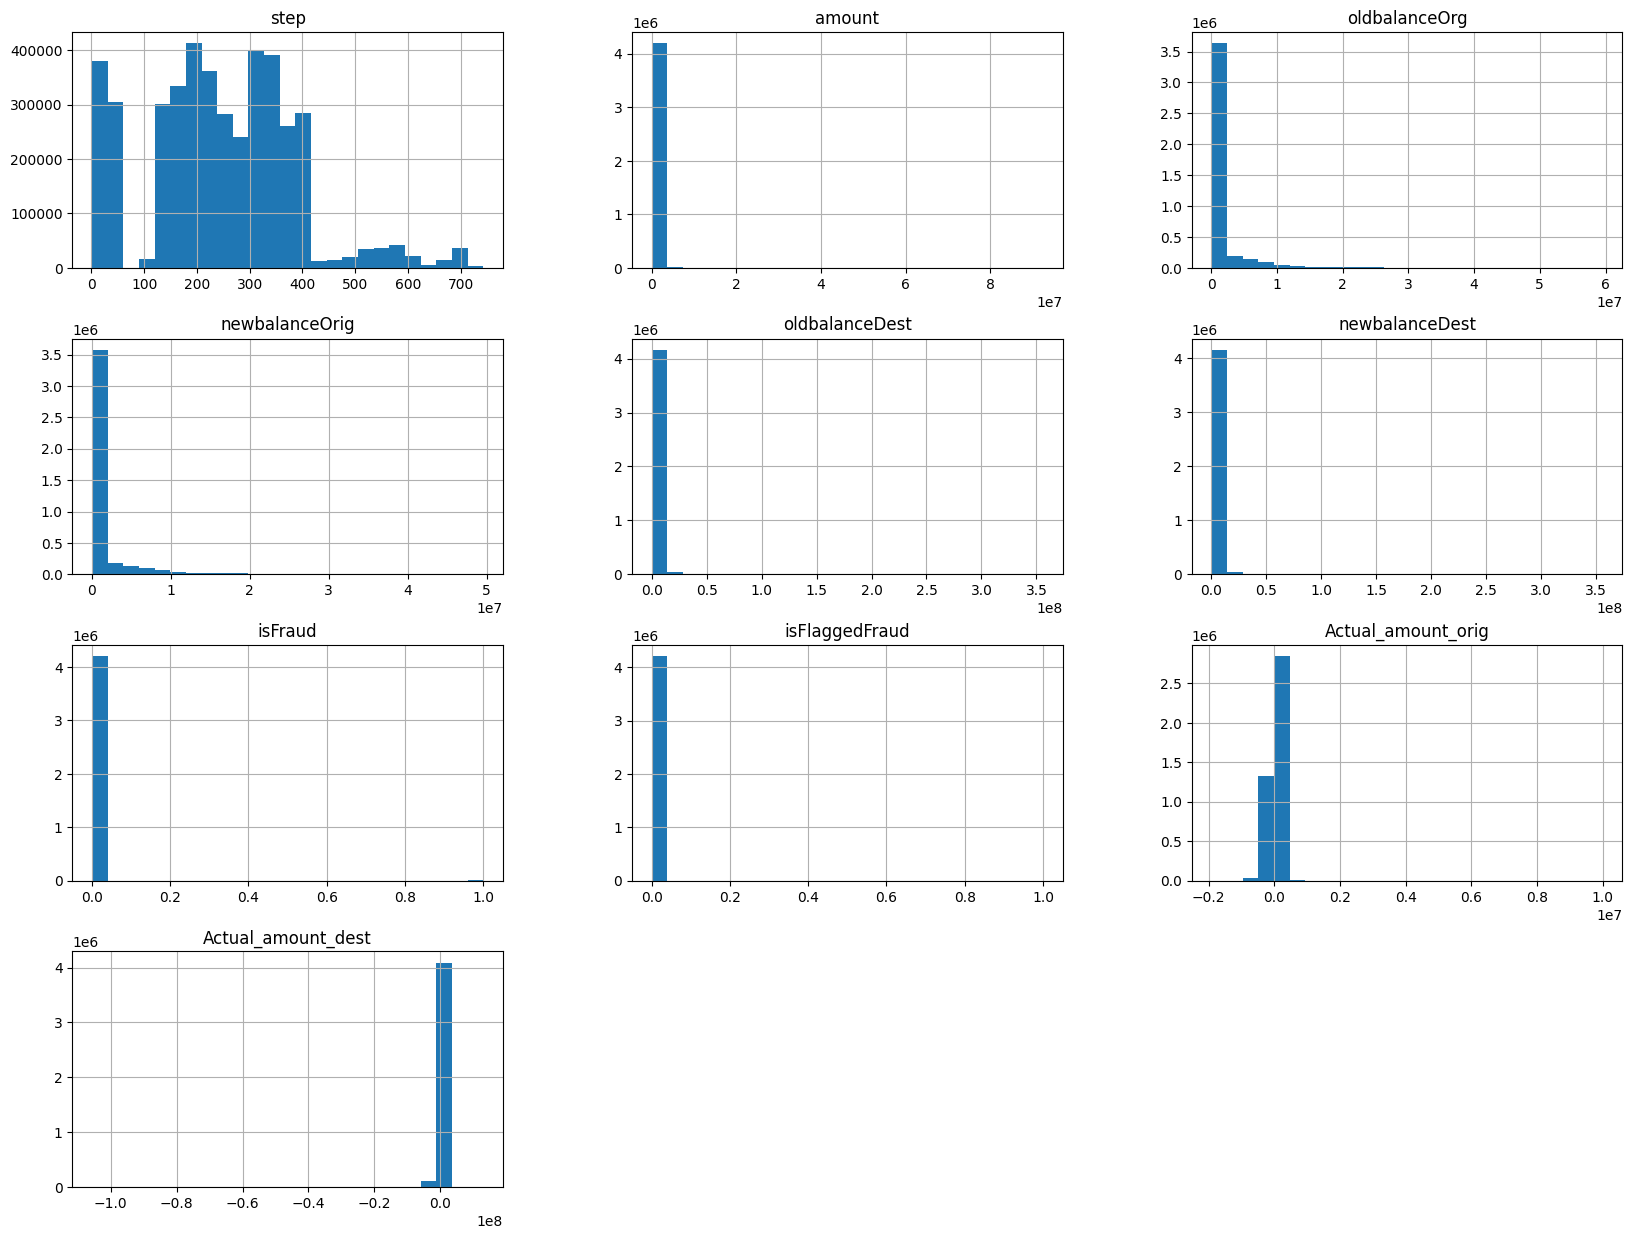

In [18]:
df.hist(bins=25, figsize=(20,15))

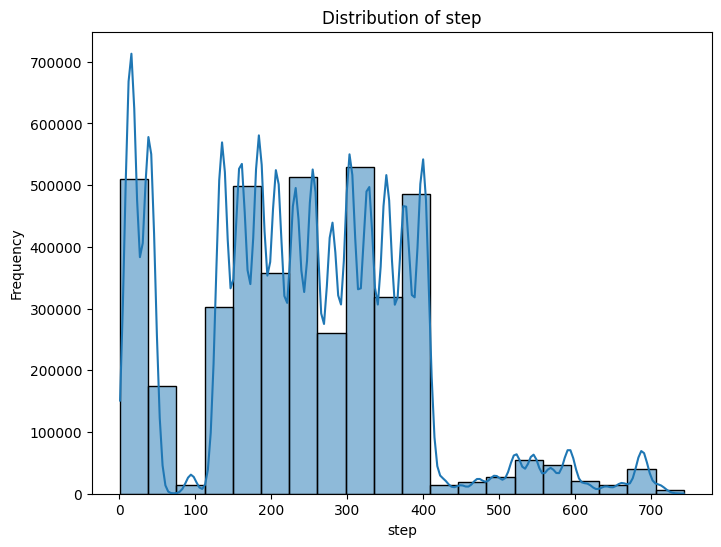

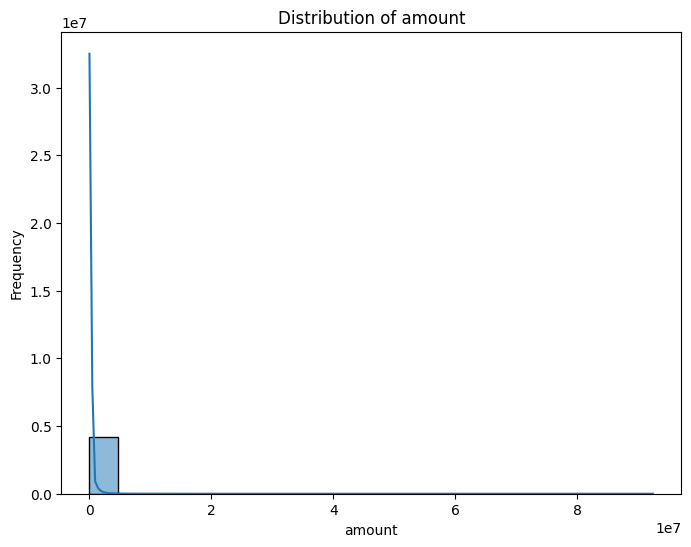

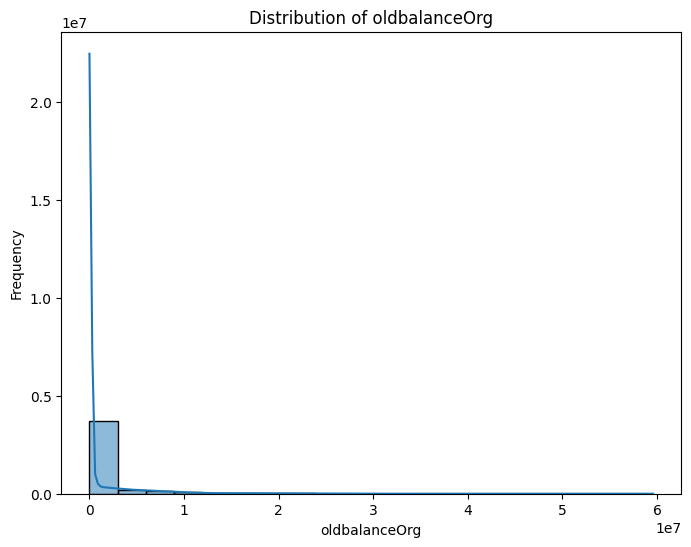

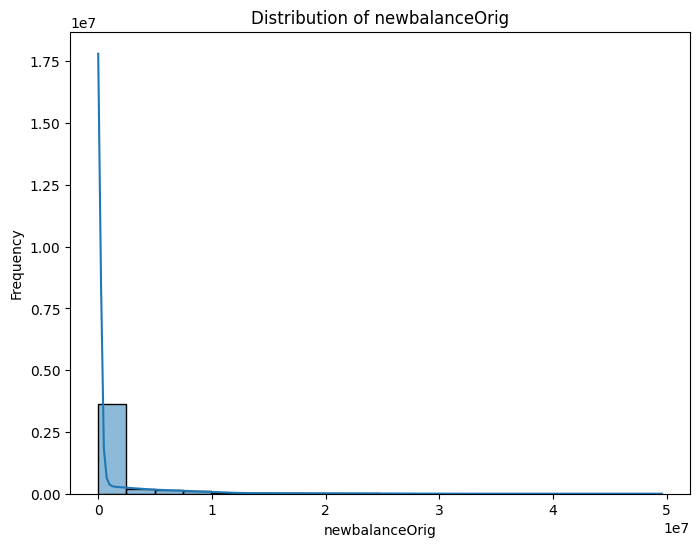

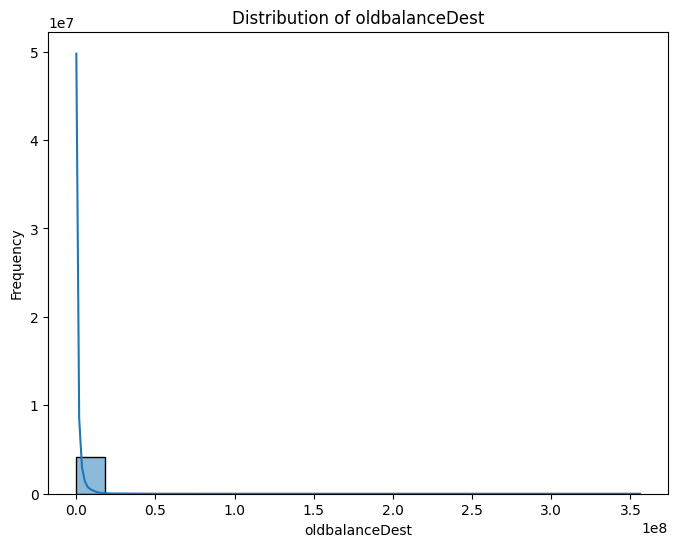

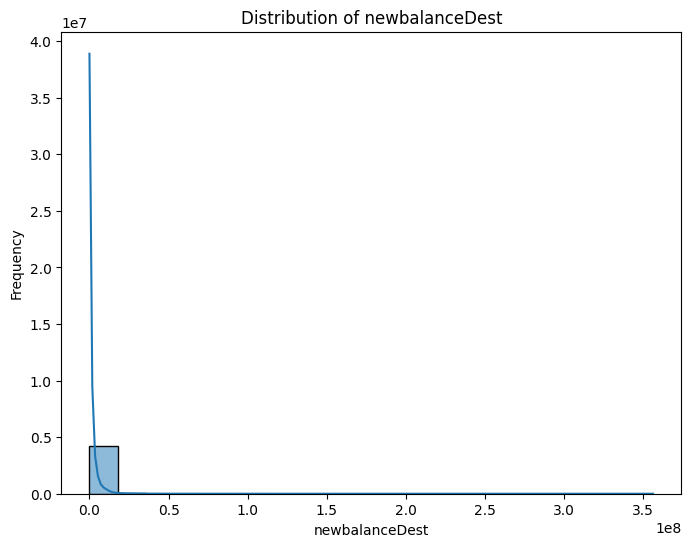

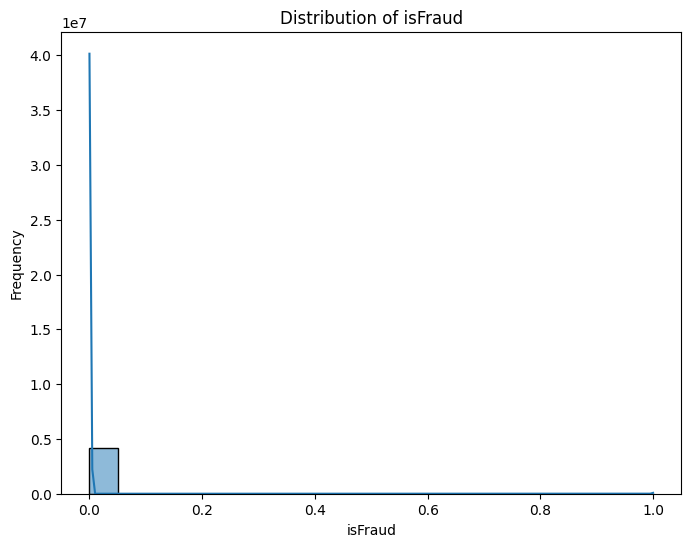

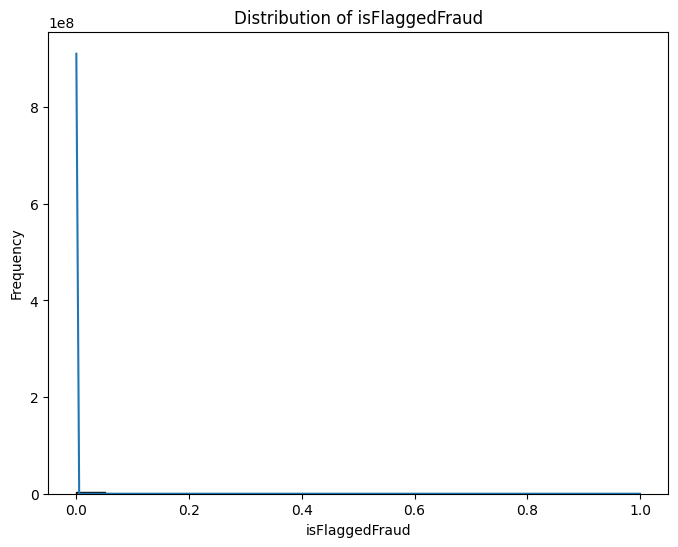

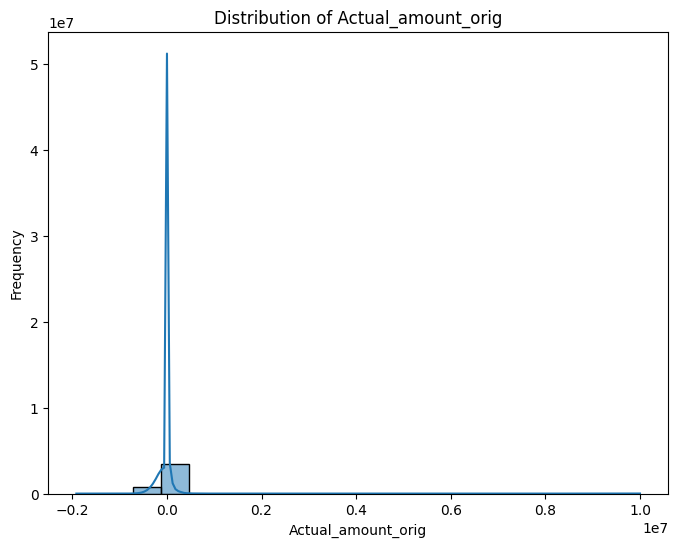

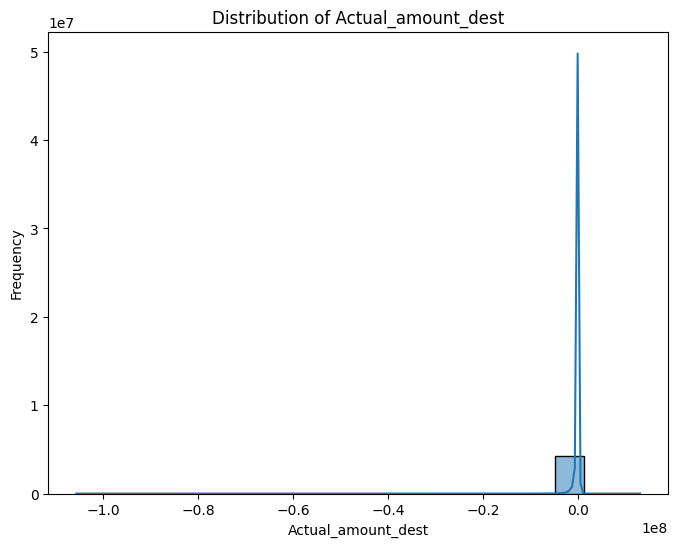

In [19]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [20]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()

for feat in objList:
    df[feat] = encod.fit_transform(df[feat].astype(str))

In [22]:
df.shape

(4211125, 11)

checking for outliers_influence

In [23]:
# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Example: Detecting outliers in the 'amount' column
outliers = detect_outliers(df, 'amount')
print(outliers.shape)


(262663, 11)


Removing outliers

In [24]:
# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"size of outliers {outliers.shape}")
    # Return the dataframe without outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Removing outliers from the 'amount' column
df = remove_outliers(df, 'amount')


size of outliers (262663, 11)


isFraud
0    3943868
1       4594
Name: count, dtype: int64


/var/folders/c5/j9cnwl7947g_40hn5s7wswc80000gn/T/ipykernel_51162/459044689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), palette="viridis")


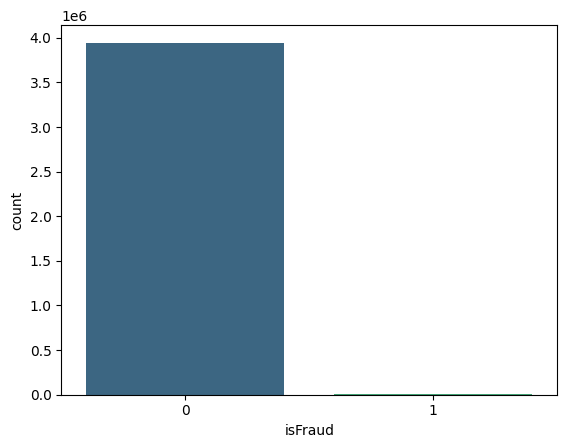

In [29]:
col = 'isFraud'
print(df['isFraud'].value_counts())
sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), palette="viridis")
plt.show()

type
1    2215670
0    1389850
3     301510
2      41432
Name: count, dtype: int64


/var/folders/c5/j9cnwl7947g_40hn5s7wswc80000gn/T/ipykernel_51162/1831881788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), palette="viridis")


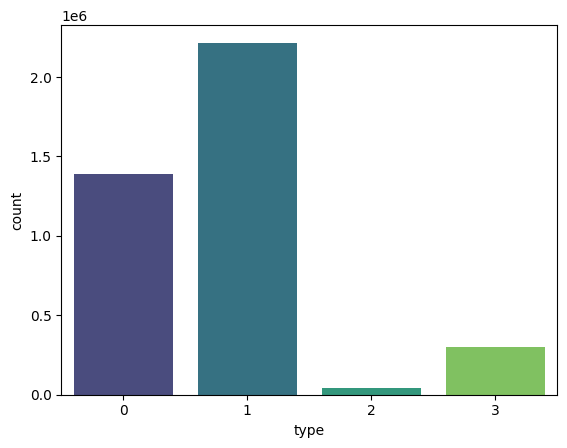

In [26]:
col = 'type'
print(df[col].value_counts())
#dataset[col].value_counts().plot(kind="barplot", autopct="%.2f")
sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), palette="viridis")
plt.show()

In [30]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
2,1,3,181.00,181.0,0.00,0.0,0.00,1,0,181.00,0.00
3,1,1,181.00,181.0,0.00,21182.0,0.00,1,0,181.00,21182.00
9,1,2,5337.77,41720.0,36382.23,41898.0,40348.79,0,0,5337.77,1549.21
10,1,2,9644.94,4465.0,0.00,10845.0,157982.12,0,0,4465.00,-147137.12
15,1,1,229133.94,15325.0,0.00,5083.0,51513.44,0,0,15325.00,-46430.44


isFlaggedFraud
0    3948459
1          3
Name: count, dtype: int64


/var/folders/c5/j9cnwl7947g_40hn5s7wswc80000gn/T/ipykernel_51162/3341536013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), palette="viridis")


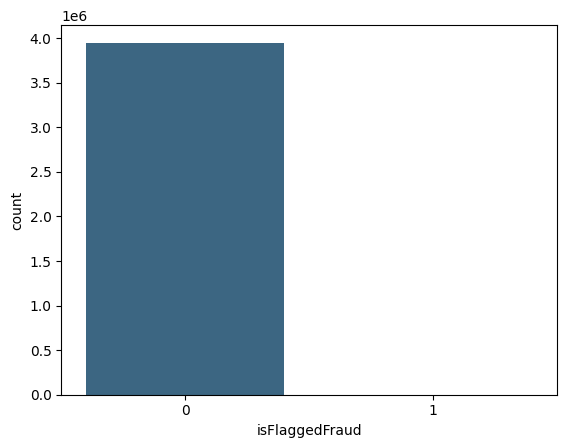

In [31]:
col = 'isFlaggedFraud'
print(df[col].value_counts())
#dataset[col].value_counts().plot(kind="barplot", autopct="%.2f")
sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), palette="viridis")
plt.show()

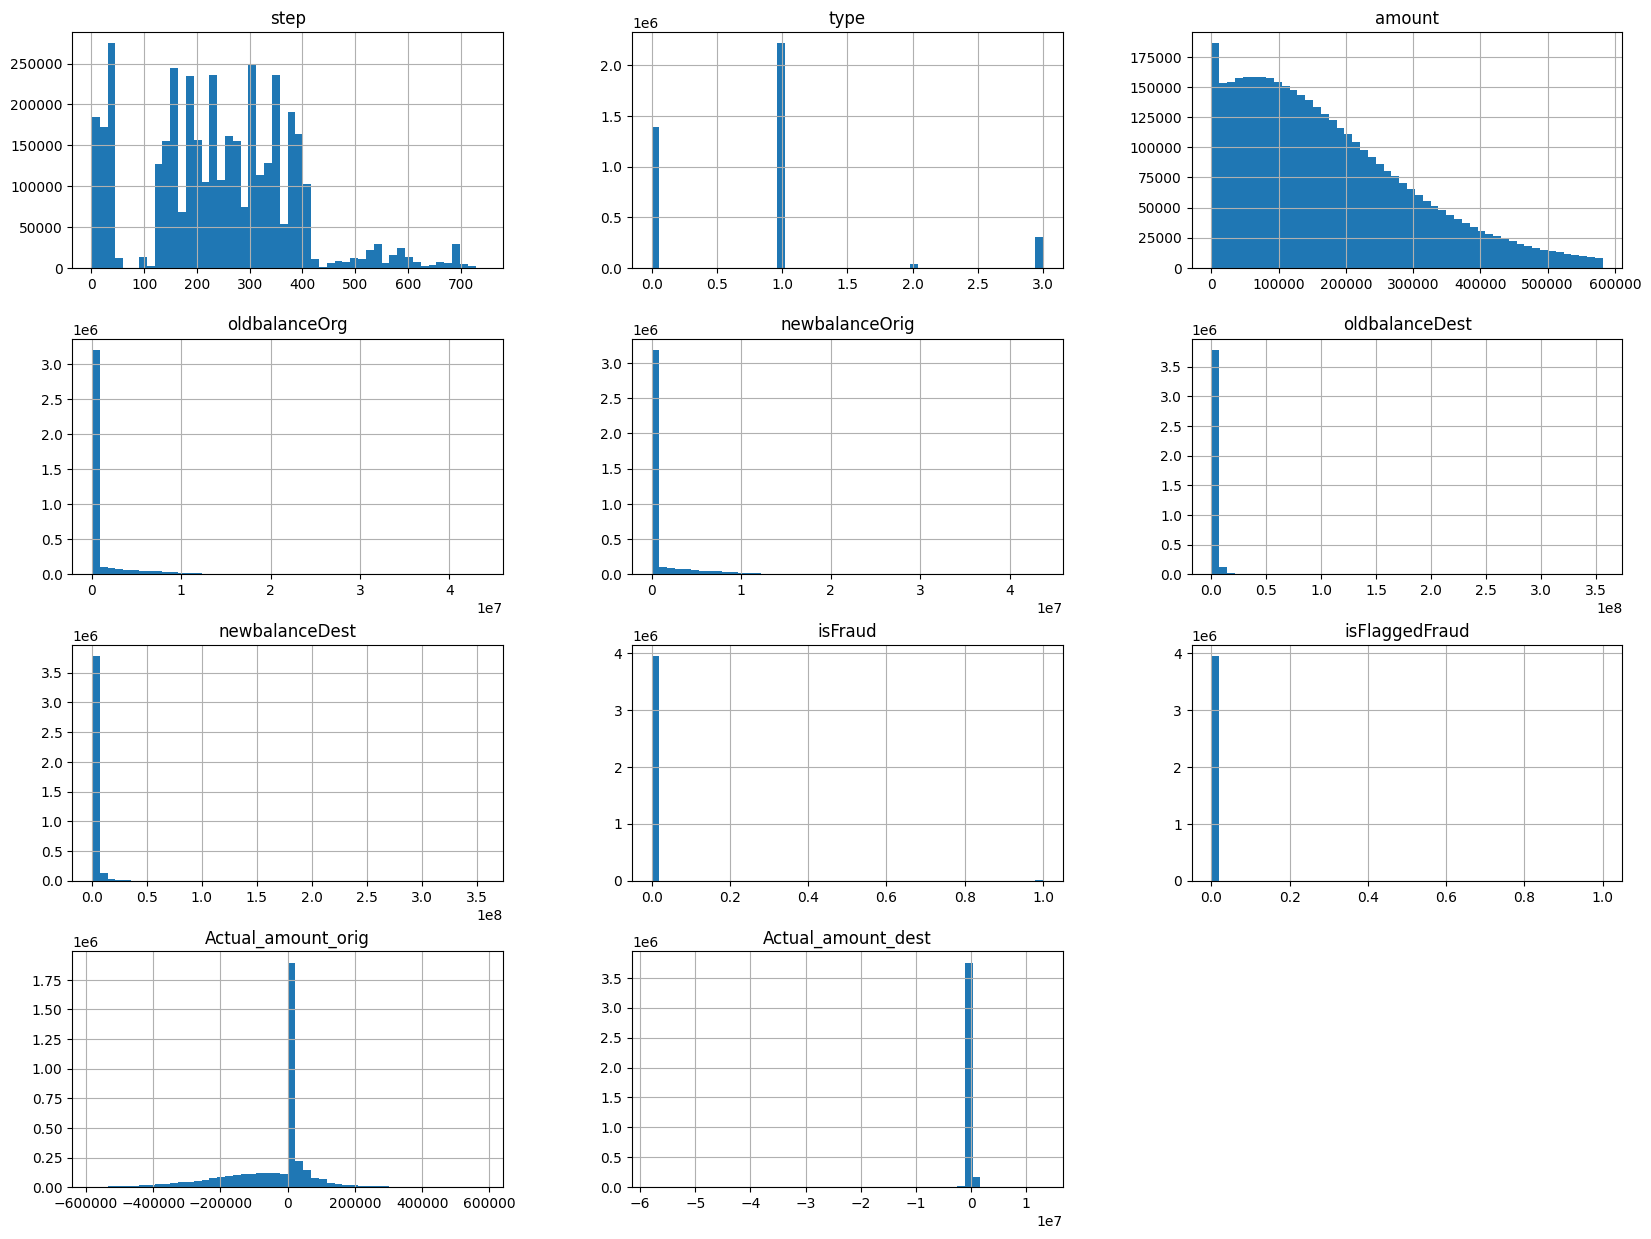

In [32]:
df.hist(bins=50, figsize=(20,15))
plt.show()

For co-linearity we can use correlation matrix

<Axes: >

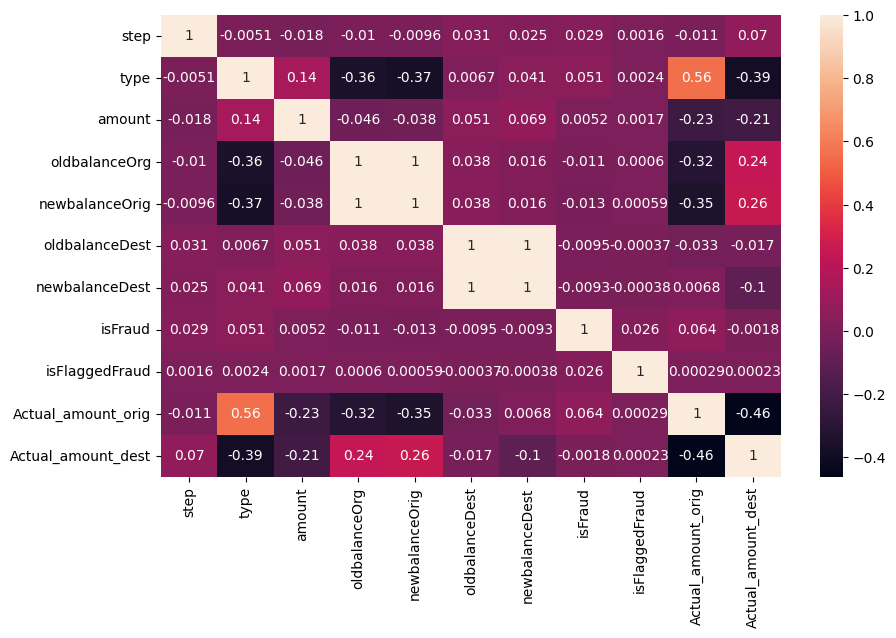

In [33]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

2. Fraud Detection Model: Detailed Description
Model Selection:

For fraud detection, models like Logistic Regression, Decision Trees, Random Forests, Gradient Boosting Machines (GBM), or even Neural Networks can be considered. Given the binary nature of fraud detection (fraud or not fraud), binary classification algorithms are well-suited.

In this case, let's use a Random Forest Classifier due to its robustness in handling imbalanced datasets, ability to capture non-linear relationships, and its ensemble nature, which reduces overfitting.

Model Process:

Data Preparation: Features like amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest will be used, and the target variable will be isFraud.

Feature Engineering: We can create new features, such as:

Transaction Type: Different transaction types might have different fraud rates.
Balance Difference: Difference between old and new balances for origin and destination accounts.
Account Activity: Frequency of transactions by a particular account.
Training: The dataset is split into training and testing sets, and the model is trained on the training set. Hyperparameter tuning (e.g., via Grid Search or Random Search) can optimize model performance.

Evaluation: Metrics like accuracy, precision, recall, F1-score, and AUC-ROC are used to assess model performance.



showing the performace for the model using best metrics

In [43]:
metr = {}

In [35]:
# Importing necessary modules for metrics computation and visualization
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, mean_absolute_error, f1_score, roc_curve, auc
import itertools

# Definition of function to compute evaluation metrics
def metric(y_test, y_pred, x_train, y_train, model):
    # Computing test accuracy
    test_acc = accuracy_score(y_test, y_pred)

    # Computing train accuracy
    train_acc = model.score(x_train, y_train)

    # Computing precision score
    precision = precision_score(y_test, y_pred, average='macro')

    # Computing recall score
    recall = recall_score(y_test, y_pred, average='macro')

    # Computing mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Computing mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # Computing F1_score
    F1_score = f1_score(y_test, y_pred, average='macro')

    # Printing computed metrics
    print('Test accuracy score:', test_acc*100, "%")
    print('Train accuracy score:', train_acc*100, "%")
    print('Precision score:', precision, "%")
    print('Recall score:', recall, "%")
    print('Mean Squared Error:', mse, "%")
    print('Mean Absolute Error:', mae, "%")
    print('F1-score:', F1_score, "%")

    # Printing classification report
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Printing confusion matrix
    print("Confusion Matrix")
    conf_mat = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    fig1 = plt.figure(figsize=(7, 6))
    plot_confusion_matrix(conf_mat, classes=y.value_counts().index.tolist(), title='Confusion matrix')
    plot_auc_roc(y_test, y_pred)
    # Returning computed metrics
    return [test_acc, train_acc, precision, recall, mse, mae, F1_score]

# Definition of function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):
    # Plotting confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(cm.shape[0]))
    plt.yticks(range(cm.shape[1]))

    # Normalizing confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
    else:
        cm = cm

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



def plot_auc_roc(y_test, y_pred):

    y_prob = y_pred
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot the AUC-ROC curve
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [37]:
y = df["isFraud"]
x = df.drop(["isFraud"], axis= 1)

In [38]:
# Split the data
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)

Shape of X_train:  (2763923, 10)
Shape of X_test:  (1184539, 10)


Lightgbm classifier

[LightGBM] [Info] Number of positive: 3209, number of negative: 2760714
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2046
[LightGBM] [Info] Number of data points in the train set: 2763923, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001161 -> initscore=-6.757285
[LightGBM] [Info] Start training from score -6.757285
Test accuracy score: 99.83039815489401 %
Train accuracy score: 99.8440260455881 %
Precision score: 0.5835242188569724 %
Recall score: 0.556709238573232 %
Mean Squared Error: 0.0016960184510598638 %
Mean Absolute Error: 0.0016960184510598638 %
F1-score: 0.5675325681099984 %
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1183154
           1       0.17      0.11

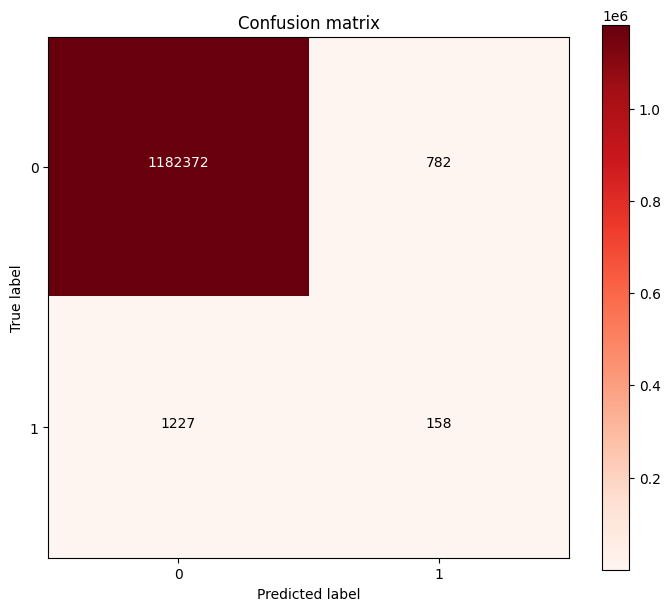

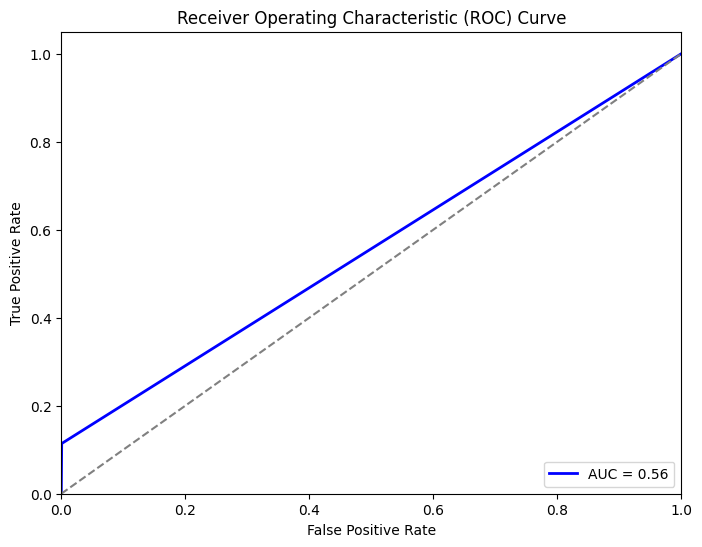

In [44]:
# build the lightgbm model

clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

# predict the results
y_pred=clf.predict(x_test)

k = metric(y_test, y_pred, x_train, y_train, clf)
metr["lgbm"] = k

Decision Tree Classifier

In [45]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

Y_pred_dt = decision_tree.predict(x_test)
decision_tree_score = decision_tree.score(x_test, y_test) * 100

Test accuracy score: 99.95449706594718 %
Train accuracy score: 100.0 %
Precision score: 0.9033679402293968 %
Recall score: 0.9013316319192336 %
Mean Squared Error: 0.0004550293405282561 %
Mean Absolute Error: 0.0004550293405282561 %
F1-score: 0.9023472028522865 %
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1183154
           1       0.81      0.80      0.80      1385

    accuracy                           1.00   1184539
   macro avg       0.90      0.90      0.90   1184539
weighted avg       1.00      1.00      1.00   1184539

Confusion Matrix


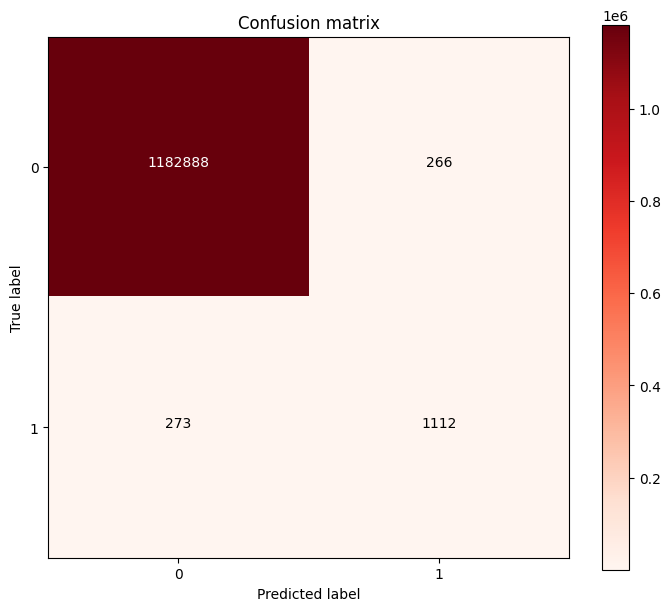

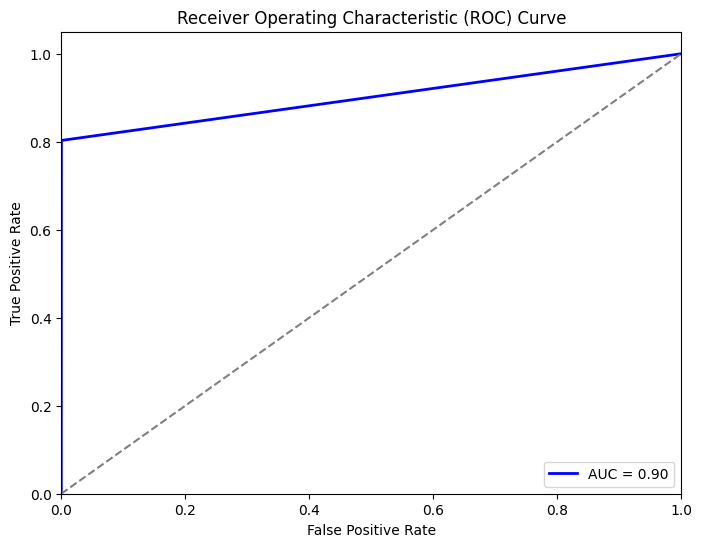

In [48]:
k = metric(y_test, Y_pred_dt, x_train, y_train, decision_tree)


In [49]:
metr['decision tree'] = k

In [50]:
random_forest = RandomForestClassifier(n_estimators= 50)
random_forest.fit(x_train, y_train)

Y_pred_rf = random_forest.predict(x_test)
random_forest_score = random_forest.score(x_test, y_test) * 100

Test accuracy score: 99.96032211687415 %
Train accuracy score: 99.99963819542006 %
Precision score: 0.9778858334151134 %
Recall score: 0.8461907919143294 %
Mean Squared Error: 0.0003967788312584052 %
Mean Absolute Error: 0.0003967788312584052 %
F1-score: 0.9014919949865594 %
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1183154
           1       0.96      0.69      0.80      1385

    accuracy                           1.00   1184539
   macro avg       0.98      0.85      0.90   1184539
weighted avg       1.00      1.00      1.00   1184539

Confusion Matrix


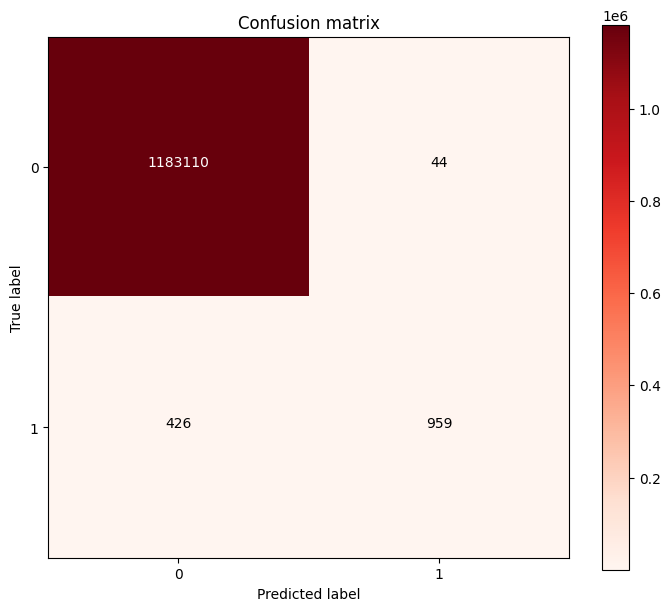

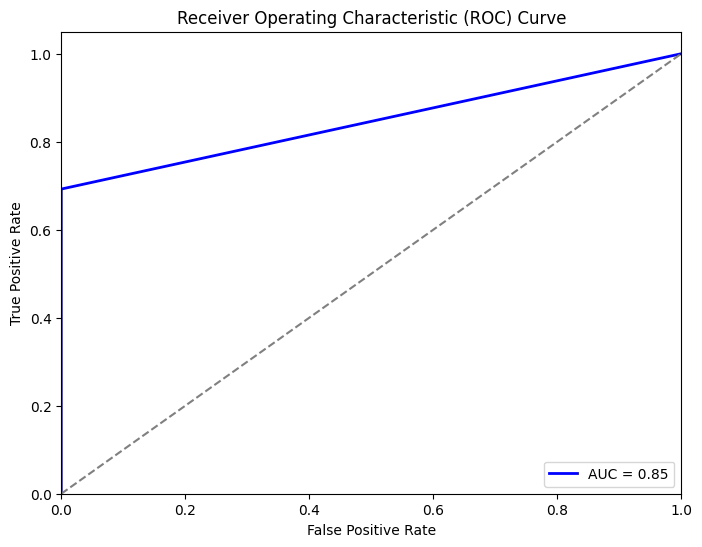

In [51]:
k = metric(y_test, Y_pred_rf, x_train, y_train, random_forest)
metr['Random Forest'] = k

( as we are getting test and train accuracies of 99.96, 99.99% using random forest classifiers repectively)

1. Data Cleaning: Handling Missing Values, Outliers, and Multicollinearity

Data Cleaning Steps:

Missing Values: checked for any null values and found there is only 1 null value in few cols. As the dataset is large, we removed the rows instead of filling


Outliers: in the data of 4.7 million we found 0.25 million outliers. We romved the outliers.
-- we can also scaled the data to decrease the outliers


Multicollinearity: we can detected the colinearity between 2 variables using correlation matrix. if values is nearer to 1 then the variables are highly co-related.


2. Fraud Detection Model: Detailed Description


For fraud detection, models like Logistic Regression, Decision Trees, Random Forests, Gradient Boosting Machines (GBM), or even Neural Networks can be considered. Given the binary nature of fraud detection (fraud or not fraud), binary classification algorithms are well-suited.

In this case, let's use a Random Forest Classifier due to its robustness in handling imbalanced datasets, ability to capture non-linear relationships, and its ensemble nature, which reduces overfitting.

Features like amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest will be used, and the target variable will be isFraud.

Feature Engineering: We can create new features, such as:

Transaction Type: Different transaction types might have different fraud rates.
Balance Difference: Difference between old and new balances for origin and destination accounts.
Account Activity: Frequency of transactions by a particular account.
Training: The dataset is split into training and testing sets, and the model is trained on the training set. Hyperparameter tuning (e.g., via Grid Search or Random Search) can optimize model performance.

Metrics like accuracy, precision, recall, F1-score, and AUC-ROC are used to assess model performance.




3. Variable Selection Process
Feature Importance and Selection:

Correlation Analysis: Start with basic correlation analysis to identify which features are highly correlated with the target variable (isFraud).

Feature Importance from Models: Use algorithms like Random Forests to rank feature importance. Features with higher importance scores contribute more to predicting fraud.

Domain Knowledge: Combine insights from the data with domain expertise. For example, a large transaction amount coupled with an empty destination account balance could be indicative of fraud.




4. Model Performance Demonstration


Accuracy: Proportion of correctly predicted observations (fraud and non-fraud) out of the total observations.

Precision and Recall: Precision is the ratio of correctly predicted fraud cases to all predicted fraud cases, while recall (sensitivity) is the ratio of correctly predicted fraud cases to all actual fraud cases.

F1-Score: Harmonic mean of precision and recall, especially useful for imbalanced datasets.

AUC-ROC Curve: Area Under the Receiver Operating Characteristic curve, which plots the true positive rate against the false positive rate. AUC values closer to 1 indicate better model performance.

Visualization:

Confusion Matrix: Provides a clear picture of True Positives, True Negatives, False Positives, and False Negatives.
Precision-Recall Curve: Particularly useful for imbalanced datasets like fraud detection.




5. Key Factors Predicting Fraudulent Customers

Transaction Type: Certain types of transactions (like CASH_OUT, TRANSFER) may be more prone to fraud.
Transaction Amount: Very high or low amounts compared to typical transactions might indicate fraud.
Balance Differences: Large discrepancies between the old and new balances, especially with no corresponding balance in the destination account, could be suspicious.
Account Activity: High frequency of transactions within a short period could indicate fraudulent behavior.



6. Do These Factors Make Sense?

Transaction Type and Amount: It's logical that certain transaction types and unusually large amounts are indicative of fraud, as fraudsters may attempt to move large sums of money quickly.

Balance Differences: Fraudulent transactions might involve draining an account or moving money to an empty account, making balance differences a crucial indicator.

If these factors didn't align with intuition, it would suggest either the need for better data preprocessing or that the model might be overfitting noise rather than identifying genuine patterns.




7. Infrastructure Update Prevention Strategies
Preventive Strategies:

Implement multi-factor authentication (MFA) to prevent unauthorized access.

Continuous monitoring of transactions using anomaly detection techniques can catch fraud as it happens.

Ensure all transaction data is encrypted and that security protocols are up to date to prevent breaches.

Conduct regular audits of the system to detect any potential vulnerabilities.



8. Evaluating the Effectiveness of Implemented Actions

Post-Implementation Evaluation:

 Monitor the reduction in fraud cases as a primary KPI. A decrease in the number of fraud cases would indicate success.

Continuously gather feedback from the fraud detection model and adjust it based on any new patterns or types of fraud detected.

If new measures are implemented, A/B testing can be conducted to compare fraud rates before and after the changes.

Track any user-reported fraud cases and analyze if these reports have reduced post-implementation.